In [260]:
# RUN THIS CELL FIRST

import matplotlib.pyplot as plt
import numpy as np

# We often use Jupyter Notebooks to make plots that simulate what is happening in the sky. Do not worry if you have never worked with Python before - all the code has been written for you.

## As you know by now, the changes we see in stars' paths in the sky are due to the rotation of Earth beneath the Celestial Sphere. We will start off by mapping their apparent motion in the sky (aka their alt-az path) at our location. 

### Below are sets of **lists** of empty tuples for each star. **Lists** are data structures used to store ordered collections of items, separated by commas. Tuples are similar but unchangeable. The alt and az given by your telescope will show something like $36^\circ 54' 56 "$. This mean 36 degrees, 54 arcminutes, 56 arcseconds. For each star, fill in the tuples in the lists with alt and az degrees, arcminutes, and arcseconds in chronological order, separated by commas.

#### Example: alt = [(36, 54, 56), (37, 63, 35), (42, 65, 71), ...]


In [261]:
# Star 1

# Enter in your collected alt values for Star 1
alt_1 = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]
# Enter in your collected az values for Star 1
az_1  = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]

# Star 2

# Enter in your collected alt values for Star 2
alt_2 = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]
# Enter in your collected az values for Star 2
az_2  = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]

# Star 3

# Enter in your collected alt values for Star 3
alt_3 = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]
# Enter in your collected az values for Star 3
az_3  = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]

# Star 4

# Enter in your collected alt values for Star 4
# alt_4 = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]
# Enter in your collected az values for Star 4
# az_4  = [(, ,), (, , ), (, ,), (, ,), (, , ), (, , ),]


SyntaxError: invalid syntax (3030214807.py, line 4)

In [262]:
def alt_az_deg(alt, az):
    def dms_to_deg(dms):
                deg, arcmin, arcsec = dms
                sign = -1 if deg < 0 else 1
                return sign * (abs(deg) + arcmin / 60.0 + arcsec / 3600.0)
    
    alt_deg = [dms_to_deg(a) for a in alt]
    az_deg  = [dms_to_deg(a) for a in az]
    return alt_deg, az_deg

In [263]:
alt_1, az_1 = alt_az_deg(alt_1, az_1)
alt_2, az_2 = alt_az_deg(alt_2, az_2)
alt_3, az_3 = alt_az_deg(alt_3, az_3)
# alt_4, az_4 = alt_az_deg(alt_4, az_4)


TypeError: cannot unpack non-iterable numpy.float64 object

In [264]:
def lst_to_radians(lst):
    h, m, s = map(float, lst.split(':'))
    lst_hours = h + m / 60.0 + s / 3600.0
    radians = (lst_hours / 24.0) * 2 * np.pi
    return radians

In [265]:
# input your LST here as a string in the format "HH:MM:SS"
# example: LST = ["20:00:00", "20:15:02", "20:30:05", "20:45:07","21:00:10","21:15:12","21:30:15","21:45:17","22:00:20", ...]

LST = []


LST_rad = [lst_to_radians(t) for t in lst_samples]


In [208]:
def r_theta(alt, az):
    """Convert alt-az coordinates to r-theta coordinates for polar plotting."""
    r = np.array(alt)
    theta = np.deg2rad(np.array(az))
    return theta, r

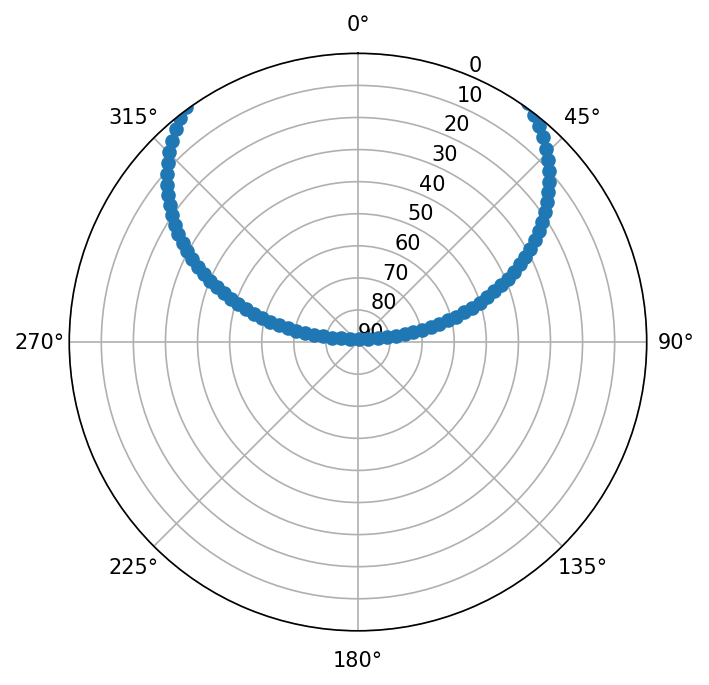

In [ ]:
fig = plt.figure(figsize=(6, 5), dpi=150)
ax = fig.add_subplot(111, polar=True)

coords_1 = r_theta(alt_1, az_1)
coords_2 = r_theta(alt_2, az_2)
coords_3 = r_theta(alt_3, az_3)
# coords_4 = r_theta(alt_4, az_4)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.plot(coords_1[0], coords_1[1], marker='o')
ax.plot(coords_2[0], coords_2[1], marker='o')
ax.plot(coords_3[0], coords_3[1], marker='o')
# ax.plot(coords_4[0], coords_4[1], marker='o')


ax.set_rlim(90, 0)
plt.show()


## Converting between altitude and azimuth to hour angle and declination
### The rotation matrix in charge of this transformation only depends on the latitude of your location.

You should know the coordinates of Campbell Hall: \
latitude: 37.87 N\
longitude: 122.25 W

In [234]:
# This function converts from hour angle and declination to altitude and azimuth using a rotation matrix dependent on latitude
# Feel free to save this function for future use! (If you are an astronomy student, you will likely need to use it again)

def ha2top(lat):
    "(ha,dec) to (alt,az)"
    rot_mat = np.array([
        [-np.sin(lat), 0, np.cos(lat)],
        [0          , -1,           0],
        [ np.cos(lat), 0, np.sin(lat)],
    ])
    return rot_mat

# This function creates a rotation matrix to convert from right ascension and declination to hour angle and declination.

def ra2ha(LST):
    "(ra,dec) to (ha,dec)"
    ones = np.ones_like(LST)
    rot_mat = np.array([
        [np.cos(LST), np.sin(LST), 0*ones],
        [-np.sin(LST), np.cos(LST), 0*ones],
        [ 0*ones, 0*ones, 1*ones],
    ])
    return rot_mat



# This function creates a vector of topological coordinates for a single alt/az point.
# A vector is a mathematical object that represents a quantity with both magnitude and direction, 
# often written as a list of numbers (its components) that describe how far it points along each 
# coordinate axis in space. (You don't need to worry about this)

def vec_top(alt, az):
    v = np.array([np.cos(alt)*np.cos(az),
                    np.cos(alt)*np.sin(az),
                    np.sin(alt)])
    return v

# Make sure to run this cell before the next one

In [ ]:

LAT =  # Define your latitude here


# Trigonometric functions in numpy only take in radians, so we convert degrees to radians

LAT_rad = np.deg2rad(LAT)


# Here we create the rotation matrix that will be used to convert between (ha,dec) and (alt,az) by calling the function defined above
R1 = ha2top(LAT_rad)

# Here we create a topological vector for each alt/az point by passing in our lists of alt and az for a single star. I'll get you started.
vtop_1 = vec_top(np.deg2rad(alt_1), np.deg2rad(az_1))

# To transform from topological coords to hour angle and declination, we multiply our vecotor with the transpose of our rotation matrix. This is essentially 
# multiplying by the inverse of the rotation matrix since it transforms from Ha, dec to alt and az. Again, no need to worry about the linear algebra 
# for this class.

vha_1 = R1.T @ vtop_1


Ha_1 = np.arctan2(vha_1[1], vha_1[0])
dec_1 = np.arcsin(vha_1[2]) 

In [217]:
# Since we are going to want to compute the Ha and Dec for each star, we will wrap this process in a function for repeated use.

def Ha_Dec(alt, az, lat):
    R = ha2top(np.deg2rad(lat))
    vtop = vec_top(np.deg2rad(alt), np.deg2rad(az))
    vha = R.T @ vtop
    return np.arctan2(vha[1], vha[0]), np.arcsin(vha[2]) 
    


In [ ]:
star_1_Ha, star_1_dec = Ha_Dec(alt_1, az_1, LAT)
star_2_Ha, star_2_dec = Ha_Dec(alt_2, az_2, LAT)
star_3_Ha, star_3_dec = Ha_Dec(alt_3, az_3, LAT)
# star_4_Ha, star_4_dec = Ha_Dec(alt_4, az_4, LAT)

## Converting between hour angle and declination to right ascension and declination
### The rotation matrix in charge of this transformation only depends on the local sidereal time of your observations.

In [ ]:
# Now we repeat the above steps to transform from hour angle and declination to right ascension and declination

R2 = ra2ha(LST_rad)
ra_dec_1 = np.einsum('jik,ik->jk',R2,vha_1)
ra_1 = np.rad2deg(np.arctan2(ra_dec_1[1], ra_dec_1[0]))
dec_1 = np.rad2deg(np.arcsin(ra_dec_1[2]))


In [236]:
# Lets put this in a function too

def Ra_Dec(alt, az, lst, lat):
    R1 = ha2top(np.deg2rad(lat))
    R2 = ra2ha(lst)
    vtop = vec_top(np.deg2rad(alt), np.deg2rad(az))
    vha = R1.T @ vtop
    ra_dec = np.einsum('jik,ik->jk',R2,vha)
    return np.arctan2(ra_dec[1], ra_dec[0]), np.arcsin(ra_dec[2]) 

In [ ]:
star_1_Ra, star_1_dec = Ra_Dec(alt_1, az_1, LST_rad, LAT)
star_2_Ra, star_2_dec = Ra_Dec(alt_2, az_2, LST_rad, LAT)
star_3_Ra, star_3_dec = Ra_Dec(alt_3, az_3, LST_rad, LAT)
# star_4_Ra, star_4_dec = Ra_Dec(alt_4, az_4, LST_rad, LAT)

# Plots plots plots!

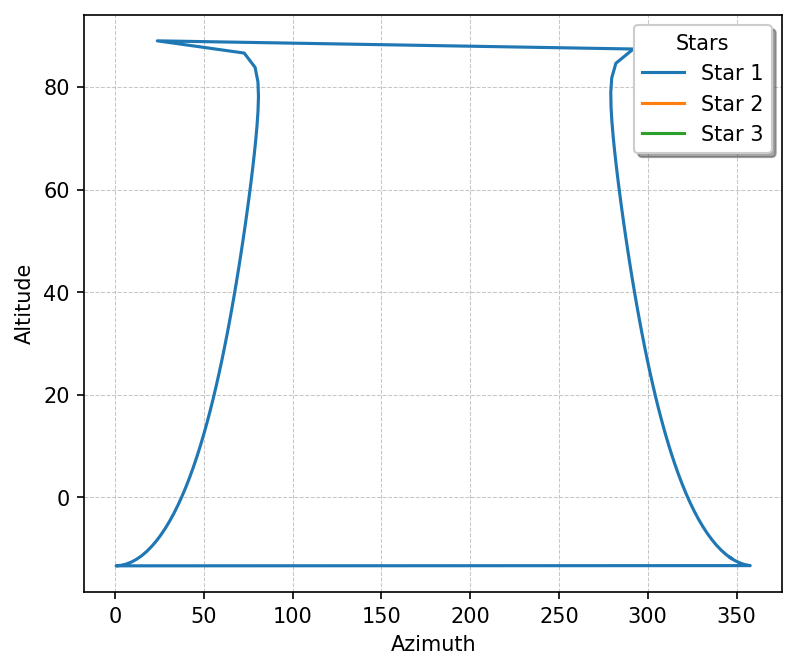

In [245]:
fig = plt.figure(figsize=(6, 5), dpi=150)
gs = fig.add_gridspec(1, hspace=0)
ax = fig.add_subplot(gs[:])

ax.plot(az_1, alt_1, label='Star 1')
ax.plot(az_2, alt_2, label='Star 2')
ax.plot(az_3, alt_3, label='Star 3')
# ax.plot(alt_4, az_4, label='Star 4')

ax.set_xlabel('Azimuth', fontsize=10)
ax.set_ylabel('Altitude', fontsize=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, zorder=1)

ax.legend(title='Stars', frameon=True, shadow=True, loc="best")


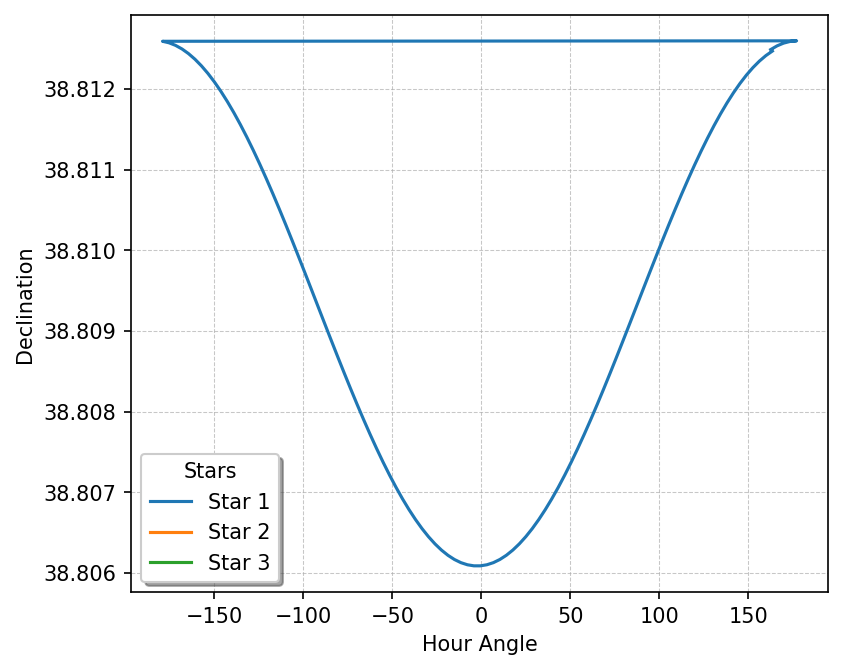

In [249]:
fig = plt.figure(figsize=(6, 5), dpi=150)
gs = fig.add_gridspec(1, hspace=0)
ax = fig.add_subplot(gs[:])

ax.plot(np.rad2deg(star_1_Ha), np.rad2deg(star_1_dec), label='Star 1')
ax.plot(np.rad2deg(star_2_Ha), np.rad2deg(star_2_dec), label='Star 2')
ax.plot(np.rad2deg(star_3_Ha), np.rad2deg(star_3_dec), label='Star 3')
# ax.plot(np.rad2deg(star_4_Ha), np.rad2deg(star_4_dec), label='Star 4')

ax.set_xlabel('Hour Angle', fontsize=10)
ax.set_ylabel('Declination', fontsize=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, zorder=1)

ax.legend(title='Stars', frameon=True, shadow=True, loc="best")


NameError: name 'star_2_Ra' is not defined

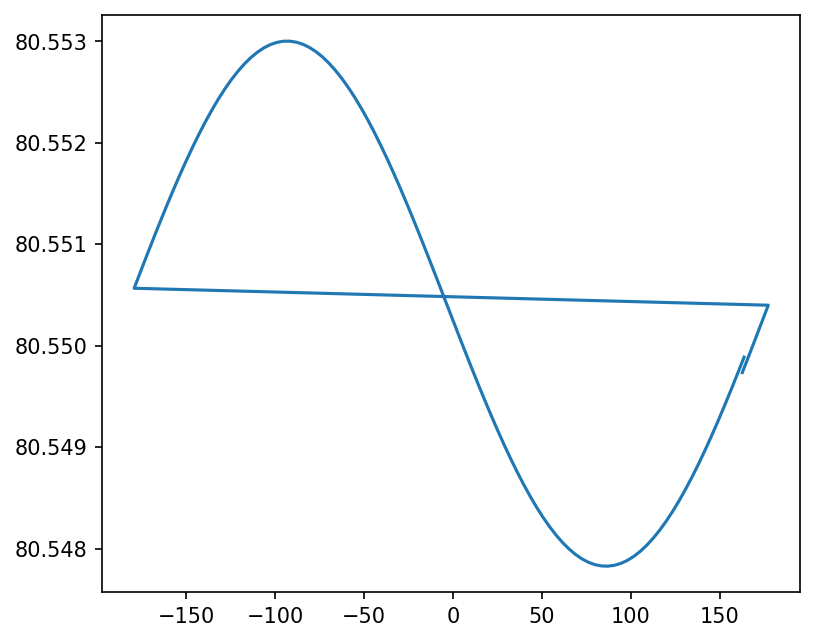

In [252]:
fig = plt.figure(figsize=(6, 5), dpi=150)
gs = fig.add_gridspec(1, hspace=0)
ax = fig.add_subplot(gs[:])

ax.plot(np.rad2deg(star_1_Ha), np.rad2deg(star_1_Ra), label='Star 1')
ax.plot(np.rad2deg(star_2_Ha), np.rad2deg(star_2_Ra), label='Star 2')
ax.plot(np.rad2deg(star_3_Ha), np.rad2deg(star_3_Ra), label='Star 3')
# ax.plot(np.rad2deg(star_4_Ha), np.rad2deg(star_4_Ra), label='Star 4')

ax.set_xlabel('Hour Angle', fontsize=10)
ax.set_ylabel('Right Ascension', fontsize=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, zorder=1)

ax.legend(title='Stars', frameon=True, shadow=True, loc="best")

NameError: name 'star_2_Ra' is not defined

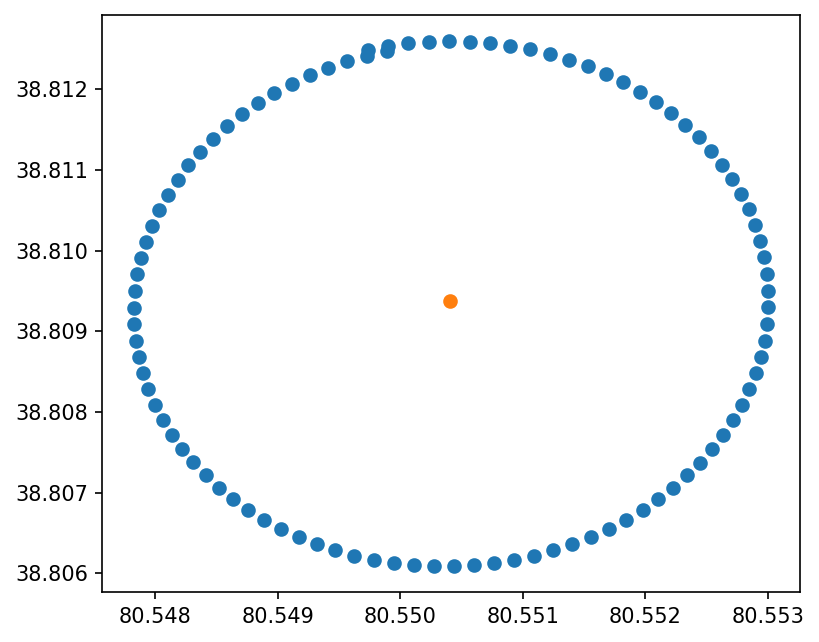

In [250]:
fig = plt.figure(figsize=(6, 5), dpi=150)
gs = fig.add_gridspec(1, hspace=0)
ax = fig.add_subplot(gs[:])

ax.scatter(np.rad2deg(star_1_Ra), np.rad2deg(star_1_dec))
ax.scatter(np.rad2deg(star_1_Ra.mean()), np.rad2deg(star_1_dec.mean()), label='Star 1')

ax.scatter(np.rad2deg(star_2_Ra),  np.rad2deg(star_2_dec))
ax.scatter(np.rad2deg(star_2_Ra.mean()), np.rad2deg(star_2_dec.mean()), label='Star 2')

ax.scatter(np.rad2deg(star_3_Ra), np.rad2deg(star_3_dec))
ax.scatter(np.rad2deg(star_3_Ra.mean()), np.rad2deg(star_3_dec.mean()), label='Star 3')

# ax.plot(np.rad2deg(star_4_Ra), np.rad2deg(star_4_dec))
# ax.plot(np.rad2deg(star_4_Ra.mean()), np.rad2deg(star_4_dec.mean()), label='Star 4')

ax.set_xlabel('Right Ascension', fontsize=10)
ax.set_ylabel('Declination', fontsize=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, zorder=1)

ax.legend(title='Stars', frameon=True, shadow=True, loc="best")


ValueError: x and y must be the same size

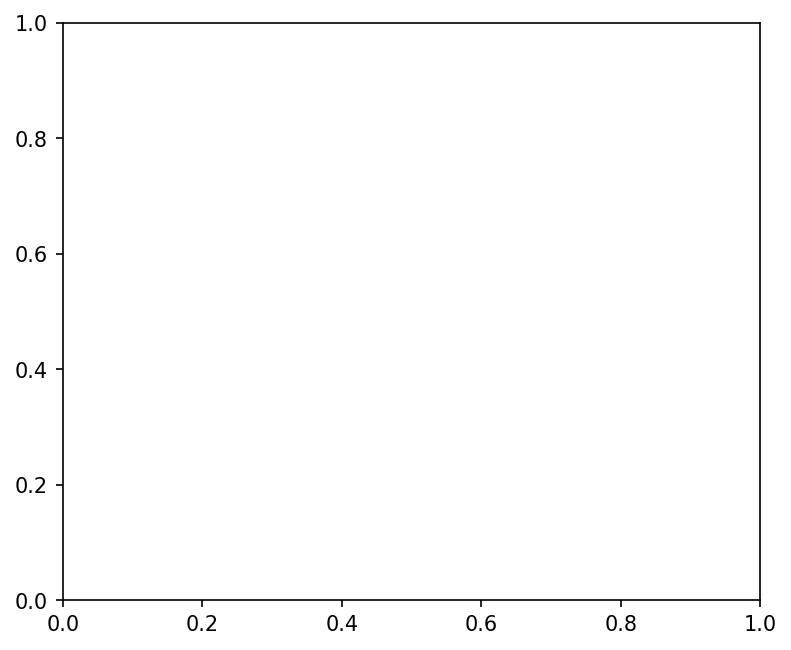

In [271]:
fig = plt.figure(figsize=(6, 5), dpi=150)
gs = fig.add_gridspec(1, hspace=0)
ax = fig.add_subplot(gs[:])

ax.scatter(LST_rad, alt_1, s=5, label='Star 1')
ax.scatter(LST_rad, alt_2, s=5, label='Star 2')
ax.scatter(LST_rad, alt_3, s=5, label='Star 3')
# ax.scatter(LST_rad, alt_4, s=5, label='Star 4')


ax.set_xlabel('Local Sidereal Time', fontsize=10)
ax.set_ylabel('Altitude', fontsize=10)

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7, zorder=1)

ax.legend(title='Stars', frameon=True, shadow=True, loc="best")
